## 코로나 이전, 코로나 이후 평균 배달 금액 차이

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36
https://www.kaggle.com/kimjihoo/ds4c-what-is-this-dataset-detailed-description

In [2]:
colnames=["날짜", "시간대별시간", "배달상점업종명", "배달상점광역시도명", "배달상점시군구명", "평균주문금액"] 
data = pd.read_csv('업종-지역별 평균주문금액.csv', names=colnames, header=None)
data.head(5)

,날짜,시간대별시간,배달상점업종명,배달상점광역시도명,배달상점시군구명,평균주문금액
0,2019-07-17,0,도시락,경기도,의정부시,21000
1,2019-07-17,0,돈까스/일식,경기도,의정부시,35000
2,2019-07-17,0,돈까스/일식,충청북도,제천시,42000
3,2019-07-17,0,배달전문업체,경기도,고양시 일산동구,23125
4,2019-07-17,0,배달전문업체,경기도,의정부시,16633


In [3]:
data['year'] = pd.DatetimeIndex(data['날짜']).year
data['month'] = pd.DatetimeIndex(data['날짜']).month
data['day'] = pd.DatetimeIndex(data['날짜']).day
data

,날짜,시간대별시간,배달상점업종명,배달상점광역시도명,배달상점시군구명,평균주문금액,year,month,day
0,2019-07-17,0,도시락,경기도,의정부시,21000,2019,7,17
1,2019-07-17,0,돈까스/일식,경기도,의정부시,35000,2019,7,17
2,2019-07-17,0,돈까스/일식,충청북도,제천시,42000,2019,7,17
3,2019-07-17,0,배달전문업체,경기도,고양시 일산동구,23125,2019,7,17
4,2019-07-17,0,배달전문업체,경기도,의정부시,16633,2019,7,17
...,...,...,...,...,...,...,...,...,...
1857388,2020-09-30,23,회,경기도,화성시,32000,2020,9,30
1857389,2020-09-30,23,회,서울특별시,도봉구,23000,2020,9,30
1857390,2020-09-30,23,회,서울특별시,은평구,35286,2020,9,30
1857391,2020-09-30,23,회,전라북도,군산시,35000,2020,9,30


In [4]:
d19 = data[data['year']==2019]
d20 = data[(data['year']==2020)&(data['month']>1)]
d1_1 = data[(data['month']==1)&(data['day']<=19)]
d1_2 = data[(data['month']==1)&(data['day']>19)]
d19코 = pd.merge(d19, d1_1,how = 'outer')
d20코 = pd.merge(d20, d1_2, how='outer')

In [5]:
d19코

,날짜,시간대별시간,배달상점업종명,배달상점광역시도명,배달상점시군구명,평균주문금액,year,month,day
0,2019-07-17,0,도시락,경기도,의정부시,21000,2019,7,17
1,2019-07-17,0,돈까스/일식,경기도,의정부시,35000,2019,7,17
2,2019-07-17,0,돈까스/일식,충청북도,제천시,42000,2019,7,17
3,2019-07-17,0,배달전문업체,경기도,고양시 일산동구,23125,2019,7,17
4,2019-07-17,0,배달전문업체,경기도,의정부시,16633,2019,7,17
...,...,...,...,...,...,...,...,...,...
692252,2020-01-19,23,회,경기도,안양시 동안구,37000,2020,1,19
692253,2020-01-19,23,회,경기도,의정부시,31000,2020,1,19
692254,2020-01-19,23,회,서울특별시,구로구,30500,2020,1,19
692255,2020-01-19,23,회,서울특별시,노원구,23000,2020,1,19


In [6]:
d20코

,날짜,시간대별시간,배달상점업종명,배달상점광역시도명,배달상점시군구명,평균주문금액,year,month,day
0,2020-02-01,0,돈까스/일식,경기도,광명시,30857,2020,2,1
1,2020-02-01,0,돈까스/일식,경기도,부천시,23083,2020,2,1
2,2020-02-01,0,돈까스/일식,경기도,의정부시,25050,2020,2,1
3,2020-02-01,0,배달전문업체,경기도,부천시,22225,2020,2,1
4,2020-02-01,0,배달전문업체,경기도,의정부시,22167,2020,2,1
...,...,...,...,...,...,...,...,...,...
1165131,2020-01-31,23,회,경기도,의정부시,38625,2020,1,31
1165132,2020-01-31,23,회,경기도,평택시,33000,2020,1,31
1165133,2020-01-31,23,회,서울특별시,노원구,21333,2020,1,31
1165134,2020-01-31,23,회,서울특별시,도봉구,21000,2020,1,31


In [7]:
group1 = d19코.groupby("배달상점업종명")
a = group1['평균주문금액'].mean()
a

배달상점업종명
도시락       25841.961190
돈까스/일식    26351.138561
배달전문업체    22193.139862
분식        19866.316613
심부름       26508.391484
아시안/양식    22841.630790
야식        26164.883065
족발/보쌈     33259.553959
중식        23694.708924
찜탕        26572.088199
치킨        22641.263862
카페/디저트    18355.621977
패스트푸드     19062.740183
피자        25643.712904
한식        23636.495408
회         34568.596164
Name: 평균주문금액, dtype: float64

In [8]:
group2 = d20코.groupby("배달상점업종명")
b = group2['평균주문금액'].mean()
b

배달상점업종명
도시락       26279.057819
돈까스/일식    26362.794995
배달전문업체    22448.131554
분식        19937.700632
심부름       26810.651290
아시안/양식    24183.840546
야식        26662.166573
족발/보쌈     34288.594481
중식        24095.041013
찜탕        26182.884205
치킨        23245.310943
카페/디저트    18188.178393
패스트푸드     18657.482381
피자        25444.700690
한식        24183.910297
회         35206.221236
Name: 평균주문금액, dtype: float64

In [9]:
abs(a - b)

배달상점업종명
도시락        437.096628
돈까스/일식      11.656435
배달전문업체     254.991692
분식          71.384019
심부름        302.259806
아시안/양식    1342.209756
야식         497.283508
족발/보쌈     1029.040521
중식         400.332090
찜탕         389.203994
치킨         604.047081
카페/디저트     167.443583
패스트푸드      405.257803
피자         199.012214
한식         547.414888
회          637.625072
Name: 평균주문금액, dtype: float64

In [10]:
[a.values]

[array([25841.96119017, 26351.13856079, 22193.13986216, 19866.31661262,
        26508.39148395, 22841.63079019, 26164.88306463, 33259.5539593 ,
        23694.70892374, 26572.0881987 , 22641.26386243, 18355.62197667,
        19062.74018339, 25643.71290357, 23636.49540836, 34568.59616415])]

In [11]:
import matplotlib.pyplot as plt
 
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

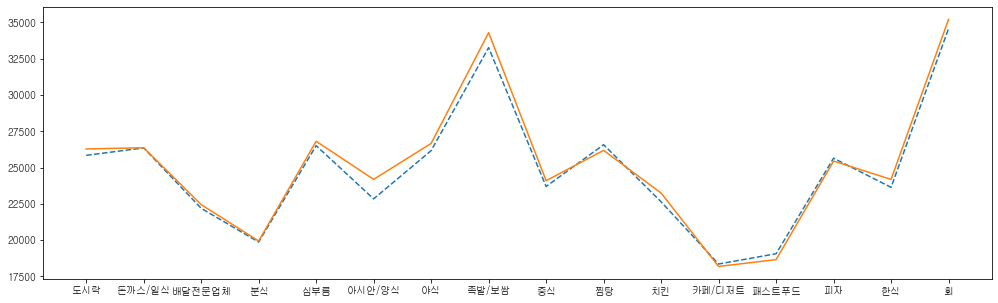

In [12]:
plt.figure(figsize=(17, 5))
x_values = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
ax = plt.subplot()
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ax.set_xticklabels(["도시락","돈까스/일식","배달전문업체","분식","심부름","아시안/양식","야식","족발/보쌈","중식","찜탕","치킨","카페/디저트","패스트푸드","피자","한식","회"])
y_values = a.values
plt.plot(x_values, y_values,linestyle ='--')
y2_values = b.values
plt.plot(x_values, y2_values)

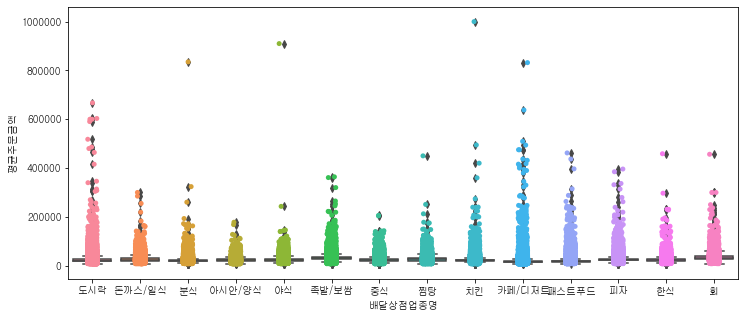

In [13]:
plt.figure(figsize=(12, 5))
sns.stripplot(x = "배달상점업종명", y  = "평균주문금액", data = d19코, order = ["도시락","돈까스/일식","분식","아시안/양식","야식","족발/보쌈","중식","찜탕","치킨","카페/디저트","패스트푸드","피자","한식","회"])
sns.boxplot(x = "배달상점업종명", y  = "평균주문금액", data = d19코, order = ["도시락","돈까스/일식","분식","아시안/양식","야식","족발/보쌈","중식","찜탕","치킨","카페/디저트","패스트푸드","피자","한식","회"])

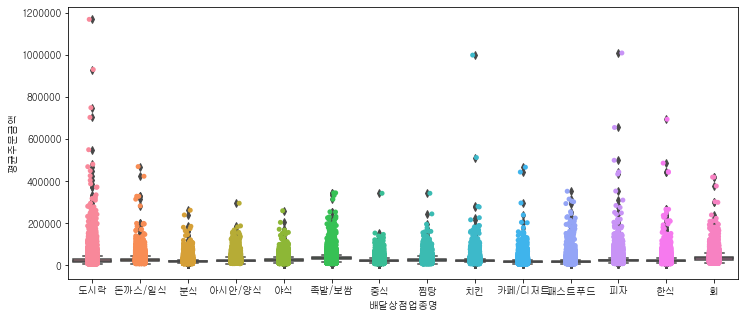

In [14]:
plt.figure(figsize=(12, 5))
sns.stripplot(x = "배달상점업종명", y  = "평균주문금액", data = d20코, order = ["도시락","돈까스/일식","분식","아시안/양식","야식","족발/보쌈","중식","찜탕","치킨","카페/디저트","패스트푸드","피자","한식","회"])
sns.boxplot(x = "배달상점업종명", y  = "평균주문금액", data = d20코, order = ["도시락","돈까스/일식","분식","아시안/양식","야식","족발/보쌈","중식","찜탕","치킨","카페/디저트","패스트푸드","피자","한식","회"])

## >> 코로나 이전, 이후의 평균 배달 금액은 (거의) 차이가 없다.

## 확진자 추이와 배달건수와의 관계

In [15]:
data2 = pd.read_csv('Time.csv')
data2

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
158,2020-06-26,0,1232315,1200885,12602,11172,282
159,2020-06-27,0,1243780,1211261,12653,11317,282
160,2020-06-28,0,1251695,1219975,12715,11364,282
161,2020-06-29,0,1259954,1228698,12757,11429,282


In [16]:
data2['day'] = pd.DatetimeIndex(data2['date']).day
data2['day']

0      20
1      21
2      22
3      23
4      24
       ..
158    26
159    27
160    28
161    29
162    30
Name: day, Length: 163, dtype: int64

In [17]:
colnames=["날짜", "시간대별시간", "도", "시","배달건수"] 
data3 = pd.read_csv('시간-지역별 배달 주문건수.csv',names=colnames,encoding='cp949')
data3['year'] = pd.DatetimeIndex(data3['날짜']).year
data3['month'] = pd.DatetimeIndex(data3['날짜']).month
data3['day'] = pd.DatetimeIndex(data3['날짜']).day
data3

,날짜,시간대별시간,도,시,배달건수,year,month,day
0,2019-07-18,0,강원도,속초시,1,2019,7,18
1,2019-07-18,0,경기도,고양시 일산동구,15,2019,7,18
2,2019-07-18,0,경기도,고양시 일산서구,6,2019,7,18
3,2019-07-18,0,경기도,의정부시,65,2019,7,18
4,2019-07-18,0,경기도,파주시,2,2019,7,18
...,...,...,...,...,...,...,...,...
381063,2020-08-31,23,전라북도,군산시,38,2020,8,31
381064,2020-08-31,23,제주특별자치도,서귀포시,13,2020,8,31
381065,2020-08-31,23,충청남도,서산시,22,2020,8,31
381066,2020-08-31,23,충청북도,제천시,7,2020,8,31


In [18]:
data3_1 = data3[(data3['year']==2020)&(data3['month']<7)&(data3['month']>1)]
data3_2 = data3[(data3['year']==2020)&(data3['month']==1)&(data3['day']>19)]
data3_F = pd.merge(data3_2,data3_1,how = 'outer')
data3_F

,날짜,시간대별시간,도,시,배달건수,year,month,day
0,2020-01-20,0,경기도,고양시 덕양구,22,2020,1,20
1,2020-01-20,0,경기도,광명시,19,2020,1,20
2,2020-01-20,0,경기도,동두천시,11,2020,1,20
3,2020-01-20,0,경기도,부천시,57,2020,1,20
4,2020-01-20,0,경기도,시흥시,1,2020,1,20
...,...,...,...,...,...,...,...,...
158419,2020-06-30,23,제주특별자치도,서귀포시,19,2020,6,30
158420,2020-06-30,23,충청남도,논산시,5,2020,6,30
158421,2020-06-30,23,충청남도,서산시,36,2020,6,30
158422,2020-06-30,23,충청북도,제천시,10,2020,6,30


In [19]:
group3 = data3_F.groupby("날짜")
c = group3['배달건수'].mean()
c

날짜
2020-01-20    26.119954
2020-01-21    27.109447
2020-01-22    28.817241
2020-01-23    32.109481
2020-01-24    28.587202
                ...    
2020-06-26    33.965116
2020-06-27    38.045240
2020-06-28    40.302889
2020-06-29    30.480788
2020-06-30    30.672566
Name: 배달건수, Length: 162, dtype: float64

In [20]:
len(data2.date)

163

In [21]:
len(c.values) #확인결과: 2020-05-18의 데이터 값이 없음

162

In [22]:
c.values.mean()

33.808226946315635

In [23]:
c.loc['2020-05-18'] = 33.808226946315635

In [24]:
c.values.min()

25.83426651735722

In [25]:
c.values.max()

44.27947154471545

(5, 50)

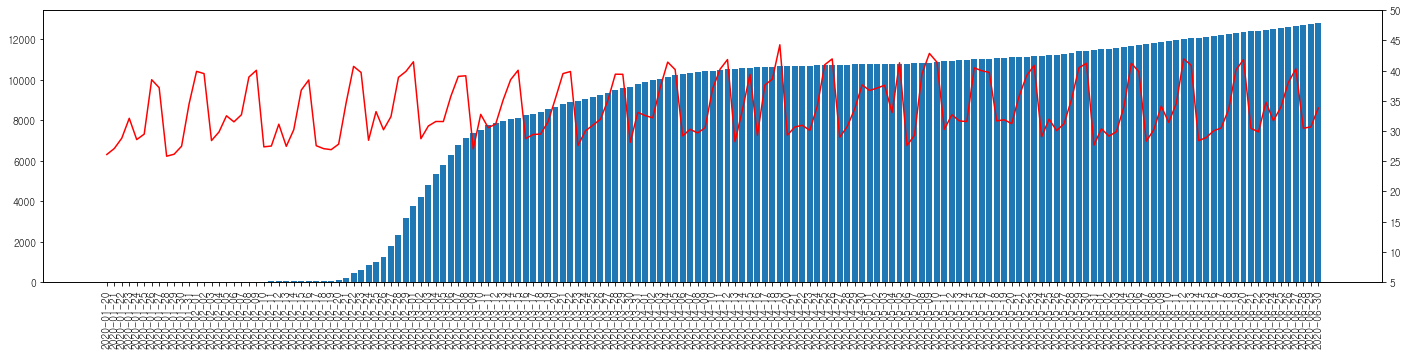

In [26]:
fig, ax1 = plt.subplots(figsize=(24, 5))
ax1 = plt.subplot()
ax1.set_xticks(np.arange(162))
ax1.set_xticklabels(data2['date'], rotation=90)
ax1.bar(data2['date'], data2['confirmed'])
ax2 = ax1.twinx()
ax2.plot(data2['date'],c.values,color='r')
ax2.set_ylim(5, 50)

In [27]:
[t_stat, p] = stats.ttest_ind(data2['confirmed'], c.values)
[t_stat, p]

[21.34511518948534, 9.678952264321745e-64]

[0.20115683047915117, 0.010029559387067071]


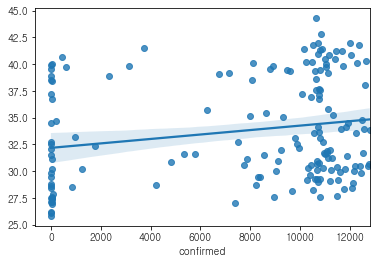

In [28]:
sns.regplot(x = data2['confirmed'],y= c.values)
[R1, p1] = stats.pearsonr(data2['confirmed'], c.values)
print([R1, p1])

In [29]:
c[c.values>40] #일월일때 값이 상승

날짜
2020-02-09    40.056008
2020-02-22    40.708824
2020-03-01    41.467807
2020-03-15    40.065476
2020-04-04    41.414387
2020-04-05    40.175077
2020-04-11    40.229253
2020-04-12    41.835245
2020-04-19    44.279472
2020-04-25    40.974874
2020-04-26    41.944615
2020-05-05    41.302817
2020-05-09    42.854227
2020-05-10    41.410822
2020-05-15    40.463320
2020-05-24    40.877979
2020-05-30    40.489776
2020-05-31    41.215855
2020-06-06    41.227273
2020-06-13    41.955896
2020-06-14    40.880759
2020-06-20    40.137419
2020-06-21    41.829020
2020-06-28    40.302889
Name: 배달건수, dtype: float64

## >>확진자 추이와 배달건수와의 관계는 없다. 배달 건수는 오직 요일에만 영향을 받으며 그 관계가 일주일씩 반복되는 현상을 볼 수 있다.

## 확진자 추이와 배달건수와의 관계-대구

In [30]:
data4 = pd.read_csv('TimeProvince.csv')
data4_1 = data4[data4['province']=='Daegu']
data4_1

,date,time,province,confirmed,released,deceased
2,2020-01-20,16,Daegu,0,0,0
19,2020-01-21,16,Daegu,0,0,0
36,2020-01-22,16,Daegu,0,0,0
53,2020-01-23,16,Daegu,0,0,0
70,2020-01-24,16,Daegu,0,0,0
...,...,...,...,...,...,...
2688,2020-06-26,0,Daegu,6903,6695,189
2705,2020-06-27,0,Daegu,6904,6700,189
2722,2020-06-28,0,Daegu,6904,6700,189
2739,2020-06-29,0,Daegu,6906,6700,189


In [31]:
data3_F_1 = data3_F[data3_F['도']=='대구광역시']
data3_F_1

,날짜,시간대별시간,도,시,배달건수,year,month,day
15,2020-01-20,0,대구광역시,수성구,9,2020,1,20
43,2020-01-20,1,대구광역시,수성구,4,2020,1,20
151,2020-01-20,11,대구광역시,달서구,3,2020,1,20
152,2020-01-20,11,대구광역시,달성군,4,2020,1,20
153,2020-01-20,11,대구광역시,서구,1,2020,1,20
...,...,...,...,...,...,...,...,...
158293,2020-06-30,21,대구광역시,수성구,7,2020,6,30
158349,2020-06-30,22,대구광역시,달서구,8,2020,6,30
158350,2020-06-30,22,대구광역시,동구,1,2020,6,30
158351,2020-06-30,22,대구광역시,서구,3,2020,6,30


In [32]:
group4 = data3_F_1.groupby("날짜")
d = group4['배달건수'].mean()
d

날짜
2020-01-20    10.395833
2020-01-21    11.416667
2020-01-22    10.693878
2020-01-23    14.125000
2020-01-24    11.051282
                ...    
2020-06-26     4.800000
2020-06-27     5.617647
2020-06-28     6.115942
2020-06-29     4.383333
2020-06-30     3.603448
Name: 배달건수, Length: 162, dtype: float64

In [33]:
d.values.mean()

6.84164993433985

In [34]:
d.loc['2020-05-18'] = 6.84164993433985

In [35]:
d.values.min(), d.values.max()

(2.813953488372093, 17.818181818181817)

(0, 20)

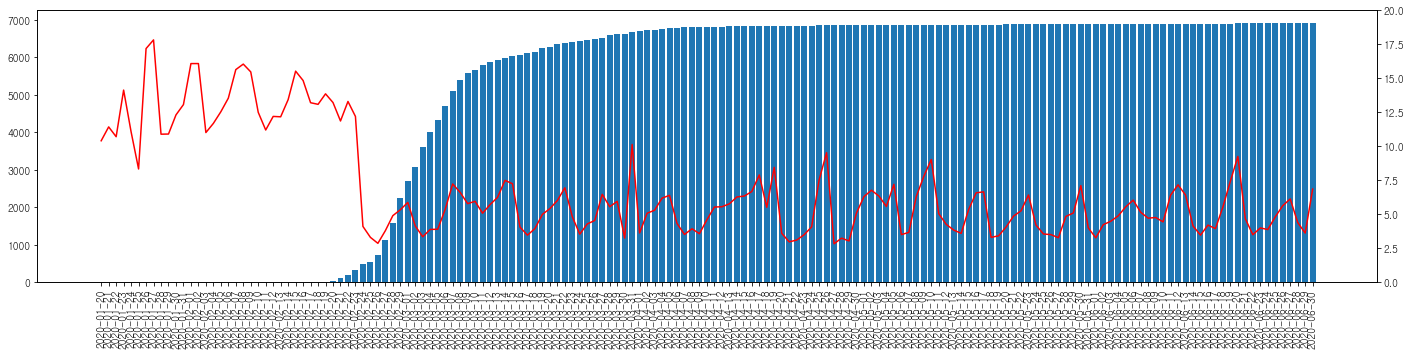

In [36]:
fig, ax1 = plt.subplots(figsize=(24, 5))
ax1 = plt.subplot()
ax1.set_xticks(np.arange(162))
ax1.set_xticklabels(data4_1['date'], rotation=90)
ax1.bar(data4_1['date'], data4_1['confirmed'])
ax2 = ax1.twinx()
ax2.plot(data4_1['date'],d.values,color='r')
ax2.set_ylim(0, 20)

In [37]:
[t_stat, p] = stats.ttest_ind(data4_1['confirmed'], d.values)
[t_stat, p]

[22.085384335192735, 1.3699685981846753e-66]

[-0.7815350637781504, 8.173347891238856e-35]


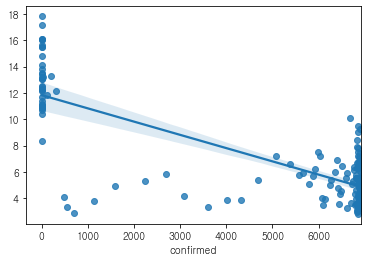

In [38]:
sns.regplot(x = data4_1['confirmed'],y= d.values)
[R1, p1] = stats.pearsonr(data4_1['confirmed'], d.values)
print([R1, p1])

## >>확진자 추이와 배달건수와의 관계가 없지만 전반적으로 봤을때 확진자가 늘어나고 나서 배달 건수가 크게 줄어든 것을 볼 수가 있다. 

## 코로나와 평균배달소요시간

In [39]:
colnames_1=["날짜", "시간대별시간", "배달상점업종명", "배달상점광역시도명", "배달상점시군구명", "평균배달소요시간(분)"] 
data5 = pd.read_csv('업종-지역별 평균배달소요시간.csv',names=colnames_1, header=None)
data5

,날짜,시간대별시간,배달상점업종명,배달상점광역시도명,배달상점시군구명,평균배달소요시간(분)
0,2019-07-17,0,도시락,경기도,의정부시,13.52
1,2019-07-17,0,돈까스/일식,경기도,의정부시,13.02
2,2019-07-17,0,돈까스/일식,충청북도,제천시,15.03
3,2019-07-17,0,배달전문업체,경기도,고양시 일산동구,19.49
4,2019-07-17,0,배달전문업체,경기도,의정부시,19.33
...,...,...,...,...,...,...
1940377,2020-09-30,23,회,경기도,화성시,30.40
1940378,2020-09-30,23,회,서울특별시,도봉구,30.97
1940379,2020-09-30,23,회,서울특별시,은평구,20.65
1940380,2020-09-30,23,회,전라북도,군산시,27.45


In [40]:
data5['year'] = pd.DatetimeIndex(data5['날짜']).year
data5['month'] = pd.DatetimeIndex(data5['날짜']).month
data5['day'] = pd.DatetimeIndex(data5['날짜']).day
data5

,날짜,시간대별시간,배달상점업종명,배달상점광역시도명,배달상점시군구명,평균배달소요시간(분),year,month,day
0,2019-07-17,0,도시락,경기도,의정부시,13.52,2019,7,17
1,2019-07-17,0,돈까스/일식,경기도,의정부시,13.02,2019,7,17
2,2019-07-17,0,돈까스/일식,충청북도,제천시,15.03,2019,7,17
3,2019-07-17,0,배달전문업체,경기도,고양시 일산동구,19.49,2019,7,17
4,2019-07-17,0,배달전문업체,경기도,의정부시,19.33,2019,7,17
...,...,...,...,...,...,...,...,...,...
1940377,2020-09-30,23,회,경기도,화성시,30.40,2020,9,30
1940378,2020-09-30,23,회,서울특별시,도봉구,30.97,2020,9,30
1940379,2020-09-30,23,회,서울특별시,은평구,20.65,2020,9,30
1940380,2020-09-30,23,회,전라북도,군산시,27.45,2020,9,30


In [41]:
d519 = data5[data5['year']==2019]
d520 = data5[(data5['year']==2020)&(data5['month']>1)]
d51_1 = data5[(data5['month']==1)&(data5['day']<=19)]
d51_2 = data5[(data5['month']==1)&(data5['day']>19)]
d519코 = pd.merge(d519, d51_1,how = 'outer')
d520코 = pd.merge(d520, d51_2, how='outer')

In [42]:
d519코

,날짜,시간대별시간,배달상점업종명,배달상점광역시도명,배달상점시군구명,평균배달소요시간(분),year,month,day
0,2019-07-17,0,도시락,경기도,의정부시,13.52,2019,7,17
1,2019-07-17,0,돈까스/일식,경기도,의정부시,13.02,2019,7,17
2,2019-07-17,0,돈까스/일식,충청북도,제천시,15.03,2019,7,17
3,2019-07-17,0,배달전문업체,경기도,고양시 일산동구,19.49,2019,7,17
4,2019-07-17,0,배달전문업체,경기도,의정부시,19.33,2019,7,17
...,...,...,...,...,...,...,...,...,...
732404,2020-01-19,23,회,경기도,안양시 동안구,15.25,2020,1,19
732405,2020-01-19,23,회,경기도,의정부시,18.92,2020,1,19
732406,2020-01-19,23,회,서울특별시,구로구,13.63,2020,1,19
732407,2020-01-19,23,회,서울특별시,노원구,25.54,2020,1,19


In [43]:
d520코

,날짜,시간대별시간,배달상점업종명,배달상점광역시도명,배달상점시군구명,평균배달소요시간(분),year,month,day
0,2020-02-01,0,돈까스/일식,경기도,광명시,25.69,2020,2,1
1,2020-02-01,0,돈까스/일식,경기도,부천시,27.17,2020,2,1
2,2020-02-01,0,돈까스/일식,경기도,의정부시,23.54,2020,2,1
3,2020-02-01,0,돈까스/일식,경상남도,진주시,21.40,2020,2,1
4,2020-02-01,0,배달전문업체,경기도,부천시,18.63,2020,2,1
...,...,...,...,...,...,...,...,...,...
1207968,2020-01-31,23,회,경기도,의정부시,14.67,2020,1,31
1207969,2020-01-31,23,회,경기도,평택시,18.62,2020,1,31
1207970,2020-01-31,23,회,서울특별시,노원구,30.21,2020,1,31
1207971,2020-01-31,23,회,서울특별시,도봉구,23.92,2020,1,31


In [44]:
group5 = d519코.groupby("배달상점업종명")
e = group5['평균배달소요시간(분)'].mean()
e

배달상점업종명
도시락       21.550487
돈까스/일식    23.547876
배달전문업체    22.543008
분식        22.564328
심부름       24.355525
아시안/양식    22.774702
야식        23.878594
족발/보쌈     23.697506
중식        22.665190
찜탕        23.212525
치킨        23.671498
카페/디저트    27.715902
패스트푸드     21.649968
피자        24.135777
한식        23.134299
회         24.853460
Name: 평균배달소요시간(분), dtype: float64

In [45]:
group6 = d520코.groupby("배달상점업종명")
f = group6['평균배달소요시간(분)'].mean()
f

배달상점업종명
도시락       23.633346
돈까스/일식    23.260530
배달전문업체    22.863751
분식        23.295028
심부름       23.305874
아시안/양식    23.965147
야식        24.475832
족발/보쌈     24.135621
중식        23.136172
찜탕        23.661087
치킨        24.242729
카페/디저트    27.999931
패스트푸드     22.125589
피자        24.081682
한식        23.175737
회         24.585491
Name: 평균배달소요시간(분), dtype: float64

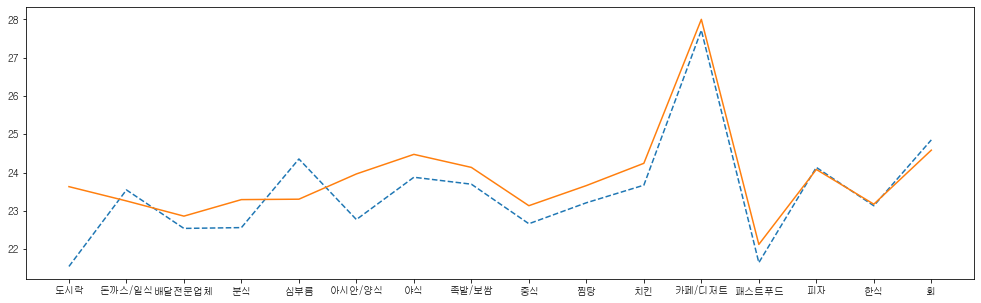

In [46]:
plt.figure(figsize=(17, 5))
x_values = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
ax = plt.subplot()
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ax.set_xticklabels(["도시락","돈까스/일식","배달전문업체","분식","심부름","아시안/양식","야식","족발/보쌈","중식","찜탕","치킨","카페/디저트","패스트푸드","피자","한식","회"])
y_values = e.values
plt.plot(x_values, y_values,linestyle ='--')
y2_values = f.values
plt.plot(x_values, y2_values)

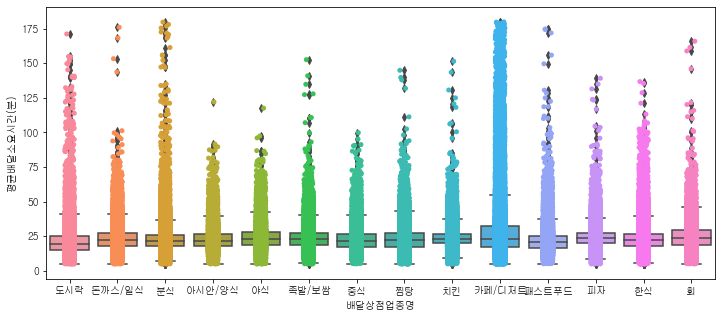

In [47]:
plt.figure(figsize=(12, 5))
sns.stripplot(x = "배달상점업종명", y  = "평균배달소요시간(분)", data = d519코, order = ["도시락","돈까스/일식","분식","아시안/양식","야식","족발/보쌈","중식","찜탕","치킨","카페/디저트","패스트푸드","피자","한식","회"])
sns.boxplot(x = "배달상점업종명", y  = "평균배달소요시간(분)", data = d519코, order = ["도시락","돈까스/일식","분식","아시안/양식","야식","족발/보쌈","중식","찜탕","치킨","카페/디저트","패스트푸드","피자","한식","회"])

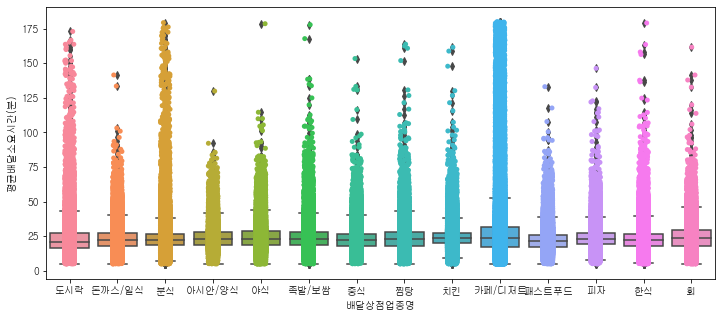

In [48]:
plt.figure(figsize=(12, 5))
sns.stripplot(x = "배달상점업종명", y  = "평균배달소요시간(분)", data = d520코, order = ["도시락","돈까스/일식","분식","아시안/양식","야식","족발/보쌈","중식","찜탕","치킨","카페/디저트","패스트푸드","피자","한식","회"])
sns.boxplot(x = "배달상점업종명", y  = "평균배달소요시간(분)", data = d520코, order = ["도시락","돈까스/일식","분식","아시안/양식","야식","족발/보쌈","중식","찜탕","치킨","카페/디저트","패스트푸드","피자","한식","회"])

## >>코로나 이전 이후 평균 배달소요시간에 대한 차이는 없다

## 코로나와 평균배달소요시간-대구

In [49]:
d520코_F = d520코[(d520코['배달상점광역시도명']=='대구광역시')&(d520코['배달상점업종명']=='치킨')]
d520코_F

,날짜,시간대별시간,배달상점업종명,배달상점광역시도명,배달상점시군구명,평균배달소요시간(분),year,month,day
85,2020-02-01,0,치킨,대구광역시,수성구,16.00,2020,2,1
193,2020-02-01,1,치킨,대구광역시,수성구,18.18,2020,2,1
949,2020-02-01,12,치킨,대구광역시,수성구,17.85,2020,2,1
1280,2020-02-01,13,치킨,대구광역시,수성구,17.32,2020,2,1
1594,2020-02-01,14,치킨,대구광역시,수성구,17.14,2020,2,1
...,...,...,...,...,...,...,...,...,...
1206633,2020-01-31,19,치킨,대구광역시,수성구,16.46,2020,1,31
1206995,2020-01-31,20,치킨,대구광역시,수성구,13.86,2020,1,31
1207339,2020-01-31,21,치킨,대구광역시,수성구,15.18,2020,1,31
1207649,2020-01-31,22,치킨,대구광역시,수성구,15.89,2020,1,31


In [50]:
group7 = d520코_F.groupby("날짜")
K = group7['평균배달소요시간(분)'].mean()
K

날짜
2020-01-20    16.208333
2020-01-21    17.332727
2020-01-22    18.572308
2020-01-23    17.218571
2020-01-24    17.706667
2020-01-25    30.750000
2020-01-26    17.133636
2020-01-27    22.284615
2020-01-28    15.875000
2020-01-29    16.454615
2020-01-30    15.912143
2020-01-31    16.078462
2020-02-01    17.602143
2020-02-02    15.477273
2020-02-03    16.410909
2020-02-04    16.662727
2020-02-05    16.825000
2020-02-06    17.037500
2020-02-07    17.589333
2020-02-08    16.665833
2020-02-09    16.915714
2020-02-10    17.619286
2020-02-11    17.028462
2020-02-12    16.641538
2020-02-13    16.696667
2020-02-14    16.308462
2020-02-15    16.478571
2020-02-16    16.695833
2020-02-17    17.135385
2020-02-18    18.341538
2020-02-19    16.582143
2020-02-20    16.674615
2020-02-21    16.020714
2020-02-22    15.332500
2020-02-23    16.652308
Name: 평균배달소요시간(분), dtype: float64

In [51]:
data4_1['year'] = pd.DatetimeIndex(data4_1['date']).year
data4_1['month'] = pd.DatetimeIndex(data4_1['date']).month
data4_1['day'] = pd.DatetimeIndex(data4_1['date']).day
data4_1

C:\Users\jenny\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jenny\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jenny\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,date,time,province,confirmed,released,deceased,year,month,day
2,2020-01-20,16,Daegu,0,0,0,2020,1,20
19,2020-01-21,16,Daegu,0,0,0,2020,1,21
36,2020-01-22,16,Daegu,0,0,0,2020,1,22
53,2020-01-23,16,Daegu,0,0,0,2020,1,23
70,2020-01-24,16,Daegu,0,0,0,2020,1,24
...,...,...,...,...,...,...,...,...,...
2688,2020-06-26,0,Daegu,6903,6695,189,2020,6,26
2705,2020-06-27,0,Daegu,6904,6700,189,2020,6,27
2722,2020-06-28,0,Daegu,6904,6700,189,2020,6,28
2739,2020-06-29,0,Daegu,6906,6700,189,2020,6,29


In [52]:
date4_1_1 = data4_1[data4_1['month']==1]
date4_1_2 = data4_1[(data4_1['month']<3)&(data4_1['day']<24)]
date4_F = pd.merge(date4_1_1,date4_1_2, how='outer')
date4_F

,date,time,province,confirmed,released,deceased,year,month,day
0,2020-01-20,16,Daegu,0,0,0,2020,1,20
1,2020-01-21,16,Daegu,0,0,0,2020,1,21
2,2020-01-22,16,Daegu,0,0,0,2020,1,22
3,2020-01-23,16,Daegu,0,0,0,2020,1,23
4,2020-01-24,16,Daegu,0,0,0,2020,1,24
5,2020-01-25,16,Daegu,0,0,0,2020,1,25
6,2020-01-26,16,Daegu,0,0,0,2020,1,26
7,2020-01-27,16,Daegu,0,0,0,2020,1,27
8,2020-01-28,16,Daegu,0,0,0,2020,1,28
9,2020-01-29,16,Daegu,0,0,0,2020,1,29


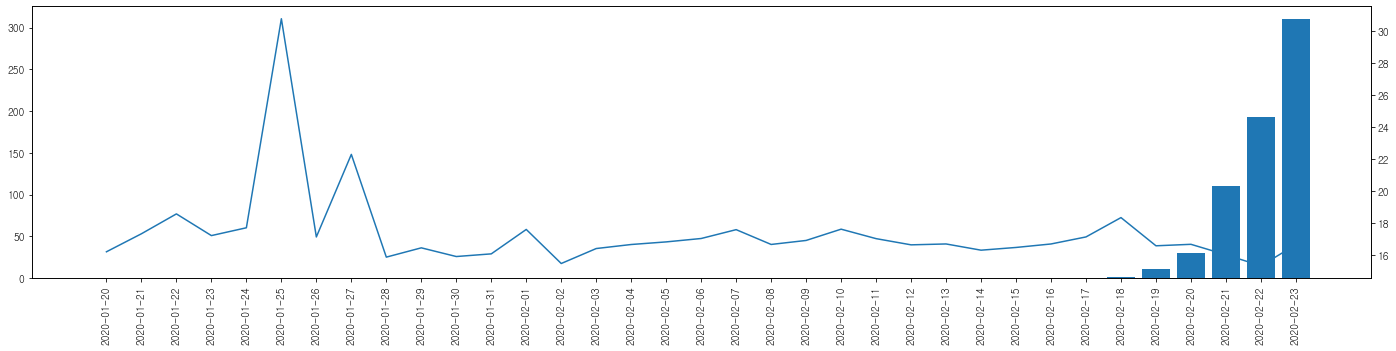

In [53]:
fig, ax1 = plt.subplots(figsize=(24, 5))
ax1 = plt.subplot()
ax1.set_xticks(np.arange(40))
ax1.set_xticklabels(date4_F['date'], rotation=90)
ax1.bar(date4_F['date'], date4_F['confirmed'])
ax2 = ax1.twinx()
ax2.plot(date4_F['date'],K.values)

## >>코로나 확진자 발생 이후 평균 배달소요시간가 줄어 든 것이 보이지만 데이터 값이 작기 때문에 확신하지 못한다. 그럴 것이다라는 예상만 가능하다.

## 날씨와 배달의 관계 - 배달

In [54]:
data_F = pd.read_csv('날씨.csv',encoding='cp949')
data_f = data_F[data_F['지점명']=='대구']
data_f

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),평균 현지기압(hPa),평균 해면기압(hPa),평균 지면온도(°C)
10718,143,대구,2019-08-01,31.1,NaN,1.8,65.3,1005.3,1011.3,35.7
10719,143,대구,2019-08-02,31.6,NaN,1.5,64.6,1005.0,1011.1,38.8
10720,143,대구,2019-08-03,29.5,NaN,2.3,68.6,1005.2,1011.2,35.6
10721,143,대구,2019-08-04,30.3,NaN,1.4,67.1,1004.5,1010.6,34.9
10722,143,대구,2019-08-05,29.9,NaN,2.8,64.1,1003.7,1009.8,37.3
...,...,...,...,...,...,...,...,...,...,...
11110,143,대구,2020-08-27,28.4,7.1,2.8,74.1,998.3,1004.4,30.0
11111,143,대구,2020-08-28,28.8,0.0,1.7,73.0,1001.7,1007.7,32.9
11112,143,대구,2020-08-29,29.8,0.5,1.4,65.4,1003.5,1009.5,34.2
11113,143,대구,2020-08-30,28.6,28.8,2.0,70.9,1004.9,1011.0,33.3


In [55]:
data3_1 = data3[data3['도']=='대구광역시']
data3_1

,날짜,시간대별시간,도,시,배달건수,year,month,day
60,2019-07-18,11,대구광역시,달서구,16,2019,7,18
61,2019-07-18,11,대구광역시,달성군,9,2019,7,18
86,2019-07-18,12,대구광역시,달서구,30,2019,7,18
87,2019-07-18,12,대구광역시,달성군,14,2019,7,18
115,2019-07-18,13,대구광역시,달서구,20,2019,7,18
...,...,...,...,...,...,...,...,...
381001,2020-08-31,22,대구광역시,동구,3,2020,8,31
381002,2020-08-31,22,대구광역시,서구,8,2020,8,31
381003,2020-08-31,22,대구광역시,수성구,4,2020,8,31
381050,2020-08-31,23,대구광역시,달서구,1,2020,8,31


In [56]:
data3_1_1 = data3_1[(data3_1['year']==2019)&(data3_1['month']>7)]
data3_1_2 = data3_1[data3_1['year']==2020]
data3_FF = pd.merge(data3_1_1, data3_1_2, how='outer')
data3_FF

,날짜,시간대별시간,도,시,배달건수,year,month,day
0,2019-08-01,10,대구광역시,서구,1,2019,8,1
1,2019-08-01,11,대구광역시,달서구,9,2019,8,1
2,2019-08-01,11,대구광역시,달성군,8,2019,8,1
3,2019-08-01,12,대구광역시,달서구,8,2019,8,1
4,2019-08-01,12,대구광역시,달성군,7,2019,8,1
...,...,...,...,...,...,...,...,...
20019,2020-08-31,22,대구광역시,동구,3,2020,8,31
20020,2020-08-31,22,대구광역시,서구,8,2020,8,31
20021,2020-08-31,22,대구광역시,수성구,4,2020,8,31
20022,2020-08-31,23,대구광역시,달서구,1,2020,8,31


In [57]:
group10 = data3_FF.groupby("날짜")
A = group10['배달건수'].mean()
A

날짜
2019-08-01     7.142857
2019-08-02     6.973684
2019-08-03     7.459459
2019-08-04     7.285714
2019-08-05     9.255319
                ...    
2020-08-27     5.014925
2020-08-28     5.765625
2020-08-29     8.770270
2020-08-30     7.638889
2020-08-31    14.776316
Name: 배달건수, Length: 396, dtype: float64

In [58]:
A.values.mean()

7.534513231518072

In [59]:
A.loc['2020-05-18'] = 7.534513231518072

In [60]:
data_f['배달량']= A.values

C:\Users\jenny\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
data_f

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),평균 현지기압(hPa),평균 해면기압(hPa),평균 지면온도(°C),배달량
10718,143,대구,2019-08-01,31.1,NaN,1.8,65.3,1005.3,1011.3,35.7,7.142857
10719,143,대구,2019-08-02,31.6,NaN,1.5,64.6,1005.0,1011.1,38.8,6.973684
10720,143,대구,2019-08-03,29.5,NaN,2.3,68.6,1005.2,1011.2,35.6,7.459459
10721,143,대구,2019-08-04,30.3,NaN,1.4,67.1,1004.5,1010.6,34.9,7.285714
10722,143,대구,2019-08-05,29.9,NaN,2.8,64.1,1003.7,1009.8,37.3,9.255319
...,...,...,...,...,...,...,...,...,...,...,...
11110,143,대구,2020-08-27,28.4,7.1,2.8,74.1,998.3,1004.4,30.0,5.765625
11111,143,대구,2020-08-28,28.8,0.0,1.7,73.0,1001.7,1007.7,32.9,8.770270
11112,143,대구,2020-08-29,29.8,0.5,1.4,65.4,1003.5,1009.5,34.2,7.638889
11113,143,대구,2020-08-30,28.6,28.8,2.0,70.9,1004.9,1011.0,33.3,14.776316


In [62]:
del data_f['지점']

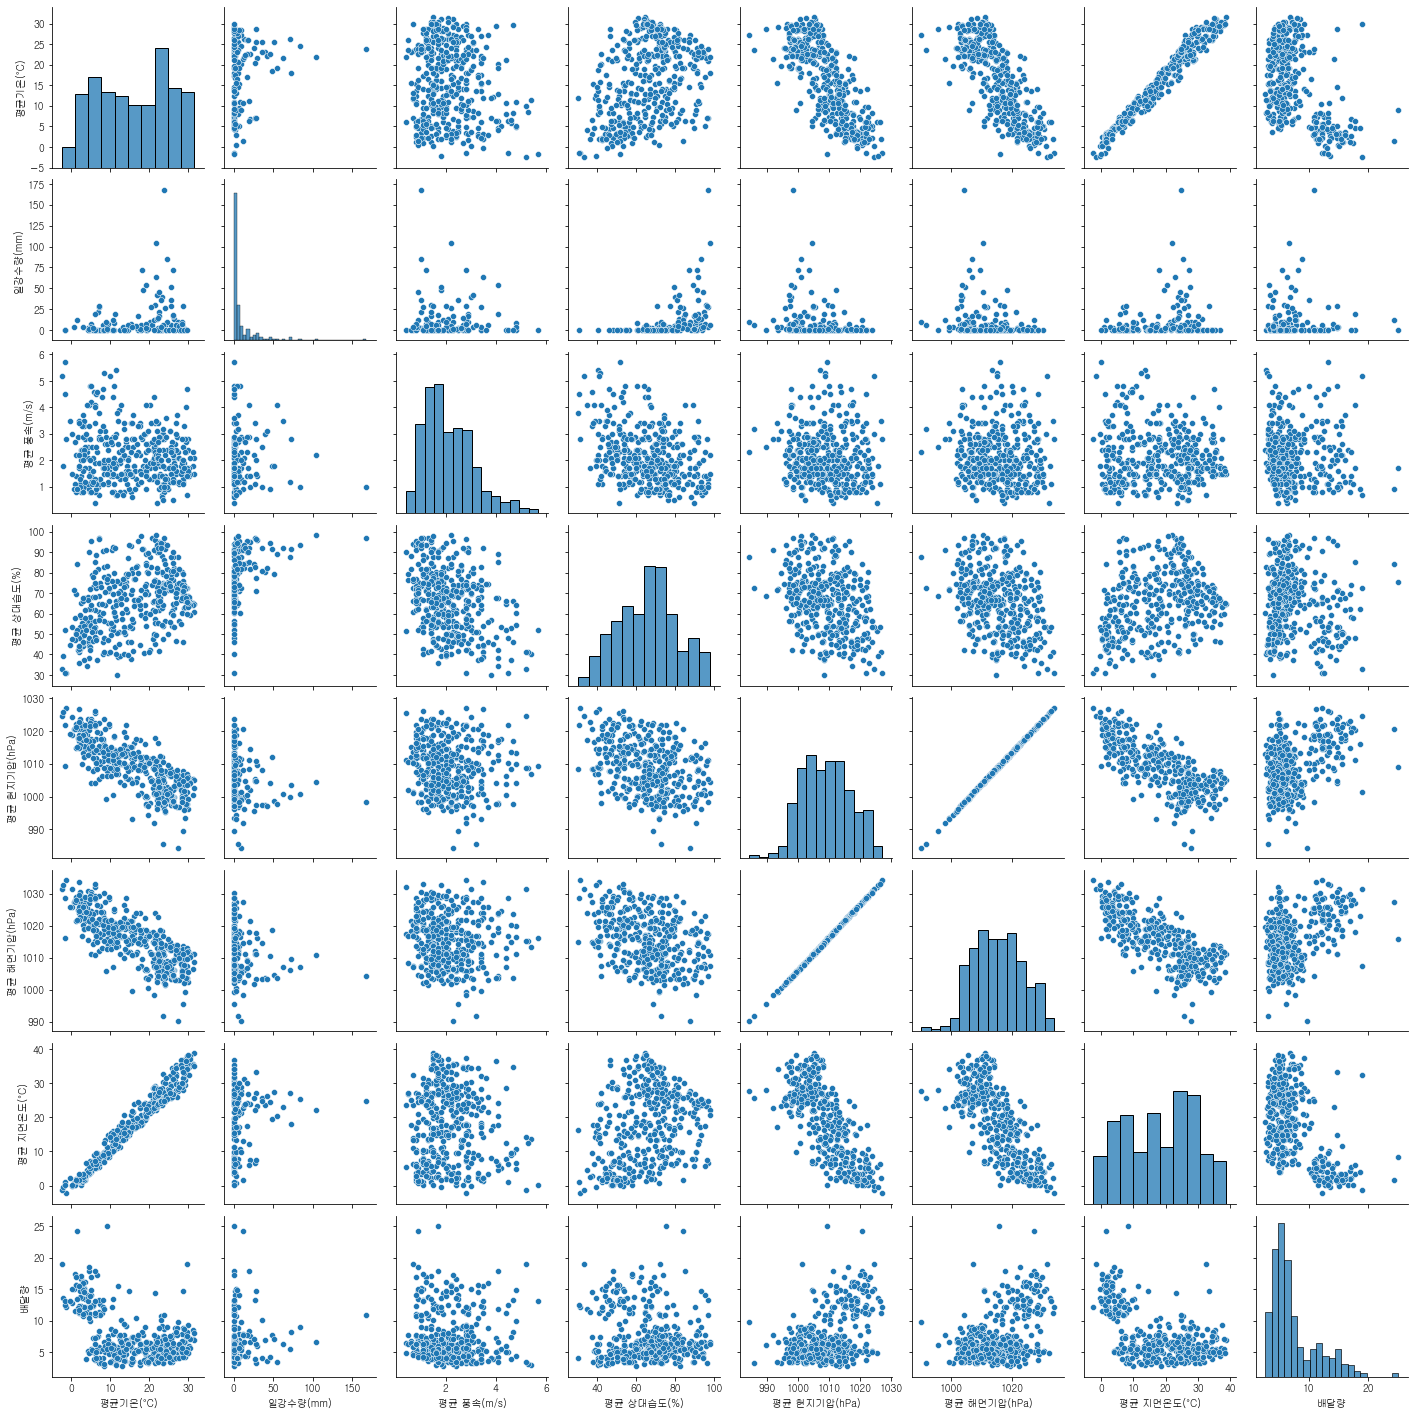

In [63]:
sns.pairplot(data_f)

In [64]:
data3_2 = data3[(data3['도']=='대구광역시')&(data3['시']=='달서구')]
data3_2

,날짜,시간대별시간,도,시,배달건수,year,month,day
60,2019-07-18,11,대구광역시,달서구,16,2019,7,18
86,2019-07-18,12,대구광역시,달서구,30,2019,7,18
115,2019-07-18,13,대구광역시,달서구,20,2019,7,18
145,2019-07-18,14,대구광역시,달서구,8,2019,7,18
177,2019-07-18,15,대구광역시,달서구,6,2019,7,18
...,...,...,...,...,...,...,...,...
380806,2020-08-31,19,대구광역시,달서구,75,2020,8,31
380870,2020-08-31,20,대구광역시,달서구,85,2020,8,31
380937,2020-08-31,21,대구광역시,달서구,75,2020,8,31
380999,2020-08-31,22,대구광역시,달서구,32,2020,8,31


In [65]:
data3_2_1 = data3_2[(data3_2['year']==2019)&(data3_2['month']>7)]
data3_2_2 = data3_2[data3_2['year']==2020]
data3_FFf = pd.merge(data3_2_1, data3_2_2, how='outer')
data3_FFf

,날짜,시간대별시간,도,시,배달건수,year,month,day
0,2019-08-01,11,대구광역시,달서구,9,2019,8,1
1,2019-08-01,12,대구광역시,달서구,8,2019,8,1
2,2019-08-01,13,대구광역시,달서구,10,2019,8,1
3,2019-08-01,14,대구광역시,달서구,7,2019,8,1
4,2019-08-01,15,대구광역시,달서구,8,2019,8,1
...,...,...,...,...,...,...,...,...
5146,2020-08-31,19,대구광역시,달서구,75,2020,8,31
5147,2020-08-31,20,대구광역시,달서구,85,2020,8,31
5148,2020-08-31,21,대구광역시,달서구,75,2020,8,31
5149,2020-08-31,22,대구광역시,달서구,32,2020,8,31


In [66]:
group11 = data3_FFf.groupby("날짜")
B = group11['배달건수'].mean()
B

날짜
2019-08-01    12.916667
2019-08-02    11.142857
2019-08-03    12.769231
2019-08-04    14.416667
2019-08-05    17.785714
                ...    
2020-08-27    11.642857
2020-08-28    13.142857
2020-08-29    20.466667
2020-08-30    18.857143
2020-08-31    38.066667
Name: 배달건수, Length: 396, dtype: float64

In [67]:
B.values.mean()

11.606396129123402

In [68]:
B.loc['2020-05-18'] = 11.606396129123402

In [69]:
data_f['배달량']=B.values
data_f

C:\Users\jenny\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,지점명,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),평균 현지기압(hPa),평균 해면기압(hPa),평균 지면온도(°C),배달량
10718,대구,2019-08-01,31.1,NaN,1.8,65.3,1005.3,1011.3,35.7,12.916667
10719,대구,2019-08-02,31.6,NaN,1.5,64.6,1005.0,1011.1,38.8,11.142857
10720,대구,2019-08-03,29.5,NaN,2.3,68.6,1005.2,1011.2,35.6,12.769231
10721,대구,2019-08-04,30.3,NaN,1.4,67.1,1004.5,1010.6,34.9,14.416667
10722,대구,2019-08-05,29.9,NaN,2.8,64.1,1003.7,1009.8,37.3,17.785714
...,...,...,...,...,...,...,...,...,...,...
11110,대구,2020-08-27,28.4,7.1,2.8,74.1,998.3,1004.4,30.0,13.142857
11111,대구,2020-08-28,28.8,0.0,1.7,73.0,1001.7,1007.7,32.9,20.466667
11112,대구,2020-08-29,29.8,0.5,1.4,65.4,1003.5,1009.5,34.2,18.857143
11113,대구,2020-08-30,28.6,28.8,2.0,70.9,1004.9,1011.0,33.3,38.066667


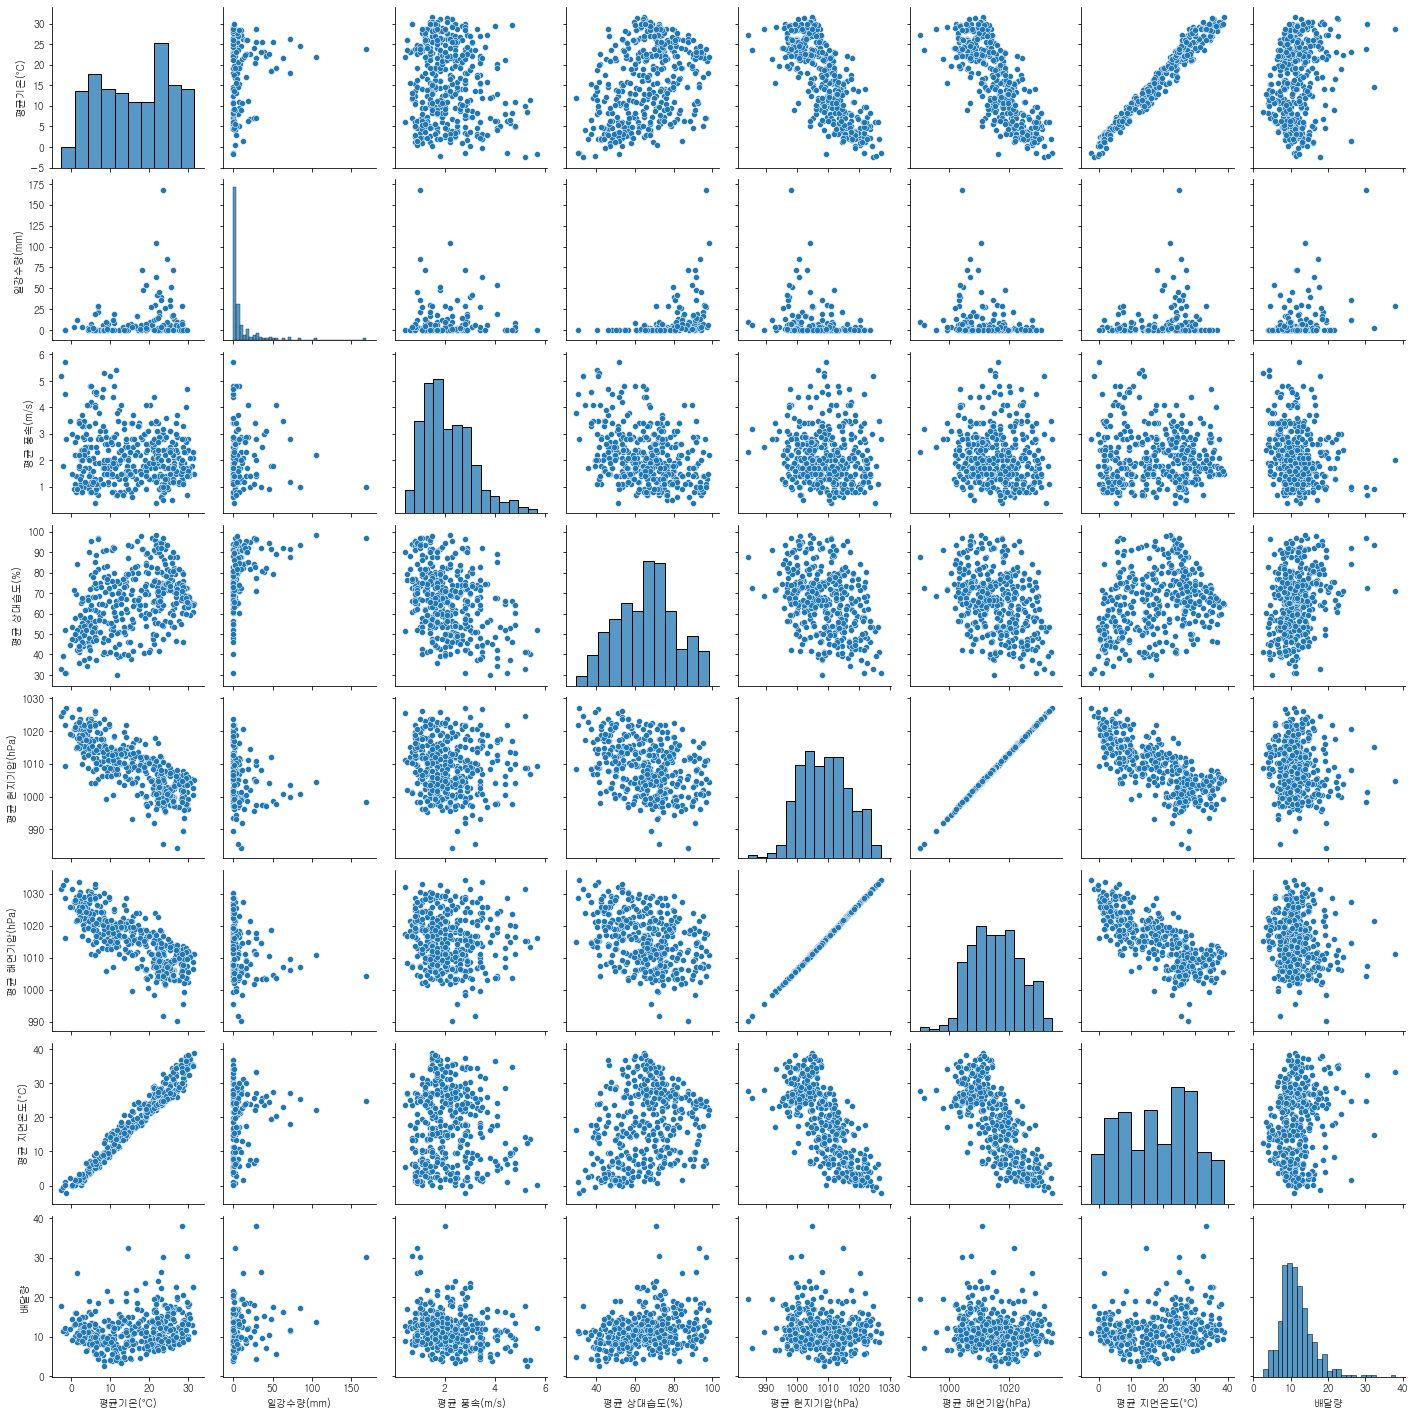

In [70]:
sns.pairplot(data_f)

## >>날씨는 배달량에 영향을 주지 않는다.

#해보고 싶었던 것
!pip install folium 

import folium
m = folium.Map(location=[37.511877, 127.059505])
m